In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
import tensorflow as tf
import tensorflow.keras.layers as L
import tensorflow.keras.models as M

In [3]:
print('Tensorflow   :', tf.__version__)

Tensorflow   : 2.9.1


In [4]:
# Проверяем что у нас работает GPU
tf.test.gpu_device_name()

'/device:GPU:0'

In [5]:
#GPU count and name
!nvidia-smi

/bin/bash: /home/greg/anaconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Fri Sep 16 18:47:41 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 515.65.01    Driver Version: 515.65.01    CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:01:00.0  On |                  N/A |
|  0%   52C    P2   109W / 350W |    841MiB / 12288MiB |     16%      Default |
|                               |                      |                  N/A |
+-------------------------------+-------------------

## Load and preprocess MNIST dataset

In [6]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

train_x = (train_x.reshape(-1, 28*28).astype(np.float32) - 127.5) / 127.5

print(train_x.shape, train_x.dtype)
print(np.min(train_x), np.max(train_x))

(60000, 784) float32
-1.0 1.0


## Draw MNIST examples

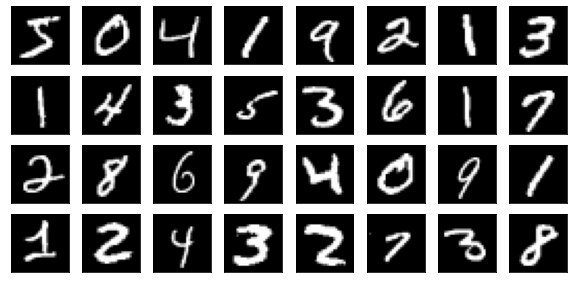

In [7]:
def plot_digits(samples):
    fig = plt.figure(figsize=(10, 10))
    num = samples.shape[0]
    for j in range(num):
        ax = fig.add_subplot(8, 8, j+1)
        ax.imshow(samples[j, ...].reshape(28, 28), cmap='gray')
        plt.xticks([]), plt.yticks([])
    plt.show()
    
plot_digits(train_x[:32, ...])

## Create GAN parts: Generator and Discriminator

In [8]:
generator = M.Sequential([
    L.Dense(256),
    L.LeakyReLU(0.2),
    L.BatchNormalization(momentum=0.8),
    L.Dense(512),
    L.LeakyReLU(0.2),
    L.BatchNormalization(momentum=0.8),
    L.Dense(1024),
    L.LeakyReLU(0.2),
    L.BatchNormalization(momentum=0.8),
    L.Dense(784, activation='tanh'),
])

discriminator = M.Sequential([
    L.Dense(784, activation=None),
    L.LeakyReLU(alpha=0.2),
    L.Dense(392, activation=None),
    L.LeakyReLU(alpha=0.2),
    L.Dense(1, activation=None),
])

## Training parameters, dataset pipeline, optimizer

In [9]:
INPUT_DIM = 100
NUM_EPOCHS = 5
HALF_BATCH_SIZE = 16
BATCH_SIZE = HALF_BATCH_SIZE * 2
LEARNING_RATE = 0.0002

train_ds = tf.data.Dataset.from_tensor_slices(train_x)
train_ds = train_ds.shuffle(buffer_size=train_x.shape[0])
train_ds = train_ds.repeat(NUM_EPOCHS)
train_ds = train_ds.batch(HALF_BATCH_SIZE, drop_remainder=True)

optimizer = tf.keras.optimizers.Adam(LEARNING_RATE)

## GAN training

1/1 [==============================] - 2s 2s/step
[Step  0] D Loss: 0.7231; G Loss: 0.6236
1/1 [==============================] - 0s 10ms/step


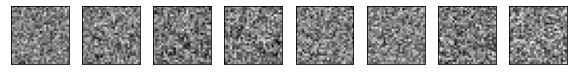

1/1 [==============================] - 0s 9ms/step


1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 9ms/step


1/1 [==============================] - 0s 10ms/step
[Step 500] D Loss: 0.0873; G Loss: 7.5507
1/1 [==============================] - 0s 9ms/step


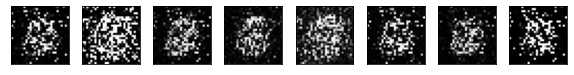

1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 10ms/step
[Step 1000] D Loss: 0.2849; G Loss: 3.3619
1/1 [==============================] - 0s 12ms/step


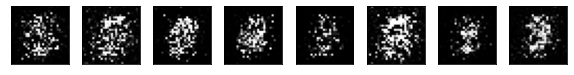

1/1 [==============================] - 0s 9ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 9ms/step


1/1 [==============================] - 0s 13ms/step
[Step 1500] D Loss: 0.3181; G Loss: 3.4000
1/1 [==============================] - 0s 12ms/step


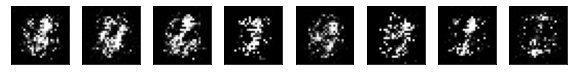

1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 11ms/step
[Step 2000] D Loss: 0.3019; G Loss: 1.5296
1/1 [==============================] - 0s 9ms/step


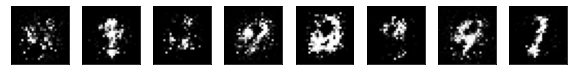

1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 9ms/step


1/1 [==============================] - 0s 9ms/step
[Step 2500] D Loss: 0.4018; G Loss: 1.6559
1/1 [==============================] - 0s 9ms/step


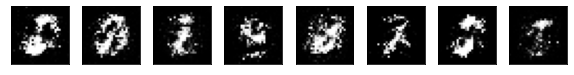

1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 9ms/step


1/1 [==============================] - 0s 12ms/step
[Step 3000] D Loss: 0.5171; G Loss: 1.2417
1/1 [==============================] - 0s 11ms/step


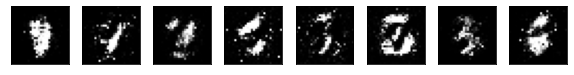

1/1 [==============================] - 0s 9ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 10ms/step
[Step 3500] D Loss: 0.5933; G Loss: 1.3752
1/1 [==============================] - 0s 10ms/step


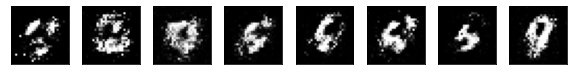

1/1 [==============================] - 0s 9ms/step


1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 10ms/step
[Step 4000] D Loss: 0.5064; G Loss: 1.9416
1/1 [==============================] - 0s 11ms/step


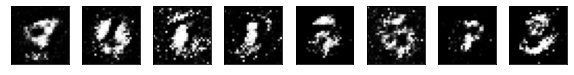

1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 9ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 12ms/step
[Step 4500] D Loss: 0.4713; G Loss: 2.2022
1/1 [==============================] - 0s 12ms/step


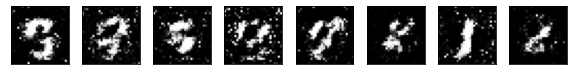

1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 8ms/step


1/1 [==============================] - 0s 10ms/step
[Step 5000] D Loss: 0.5014; G Loss: 2.0819
1/1 [==============================] - 0s 10ms/step


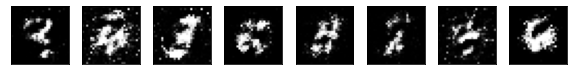

1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 9ms/step


1/1 [==============================] - 0s 9ms/step
[Step 5500] D Loss: 0.7510; G Loss: 0.9528
1/1 [==============================] - 0s 9ms/step


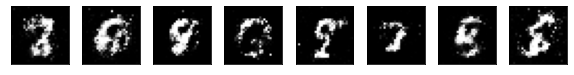

1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 10ms/step
[Step 6000] D Loss: 0.5167; G Loss: 1.4431
1/1 [==============================] - 0s 10ms/step


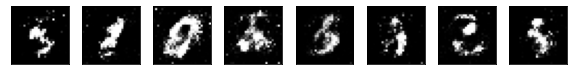

1/1 [==============================] - 0s 9ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 10ms/step
[Step 6500] D Loss: 0.4717; G Loss: 1.4634
1/1 [==============================] - 0s 9ms/step


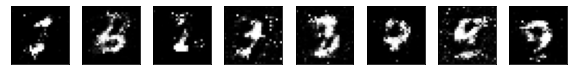

1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 12ms/step
[Step 7000] D Loss: 0.4156; G Loss: 1.9702
1/1 [==============================] - 0s 10ms/step


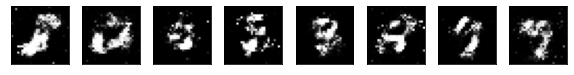

1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 11ms/step
[Step 7500] D Loss: 0.6422; G Loss: 1.2450
1/1 [==============================] - 0s 10ms/step


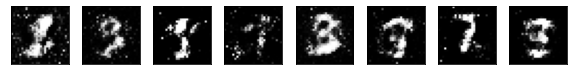

1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 9ms/step


1/1 [==============================] - 0s 10ms/step
[Step 8000] D Loss: 0.6334; G Loss: 1.2124
1/1 [==============================] - 0s 10ms/step


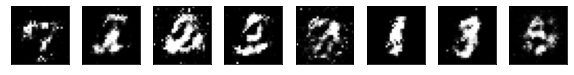

1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 9ms/step


1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 10ms/step
[Step 8500] D Loss: 0.5215; G Loss: 1.0335
1/1 [==============================] - 0s 10ms/step


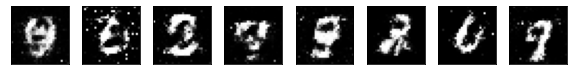

1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 9ms/step


1/1 [==============================] - 0s 10ms/step
[Step 9000] D Loss: 0.6125; G Loss: 0.9055
1/1 [==============================] - 0s 10ms/step


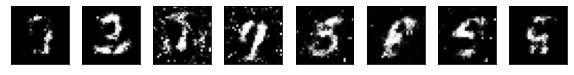

1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 10ms/step
[Step 9500] D Loss: 0.5953; G Loss: 1.2824
1/1 [==============================] - 0s 10ms/step


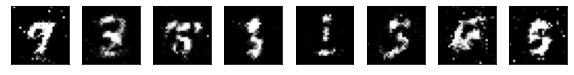

1/1 [==============================] - 0s 9ms/step


1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 10ms/step
[Step 10000] D Loss: 0.4425; G Loss: 1.5580
1/1 [==============================] - 0s 10ms/step


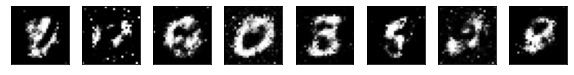

1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 11ms/step
[Step 10500] D Loss: 0.4959; G Loss: 1.3685
1/1 [==============================] - 0s 11ms/step


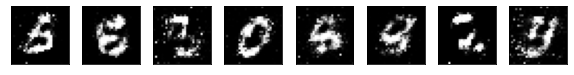

1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 10ms/step
[Step 11000] D Loss: 0.6552; G Loss: 1.1583
1/1 [==============================] - 0s 9ms/step


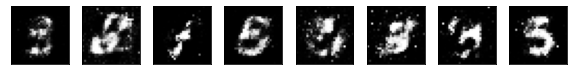

1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 9ms/step


1/1 [==============================] - 0s 9ms/step
[Step 11500] D Loss: 0.4684; G Loss: 1.0899
1/1 [==============================] - 0s 10ms/step


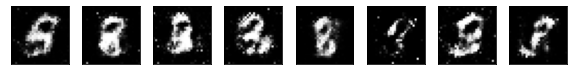

1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 9ms/step
[Step 12000] D Loss: 0.5764; G Loss: 0.9582
1/1 [==============================] - 0s 9ms/step


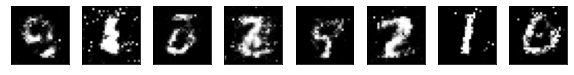

1/1 [==============================] - 0s 9ms/step


1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 10ms/step
[Step 12500] D Loss: 0.5404; G Loss: 0.9477
1/1 [==============================] - 0s 10ms/step


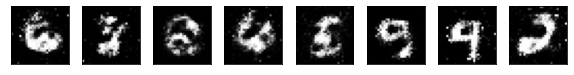

1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 9ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 11ms/step
[Step 13000] D Loss: 0.5016; G Loss: 1.2959
1/1 [==============================] - 0s 11ms/step


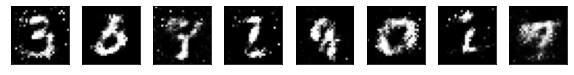

1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 13ms/step
[Step 13500] D Loss: 0.5531; G Loss: 1.2207
1/1 [==============================] - 0s 12ms/step


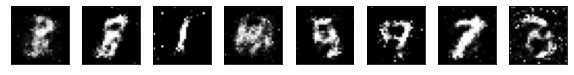

1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 9ms/step
[Step 14000] D Loss: 0.7487; G Loss: 1.3996
1/1 [==============================] - 0s 12ms/step


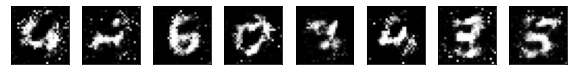

1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 9ms/step


1/1 [==============================] - 0s 10ms/step
[Step 14500] D Loss: 0.4100; G Loss: 1.7115
1/1 [==============================] - 0s 10ms/step


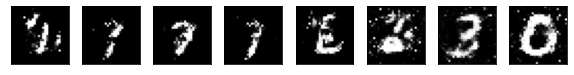

1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 10ms/step
[Step 15000] D Loss: 0.4297; G Loss: 2.0384
1/1 [==============================] - 0s 10ms/step


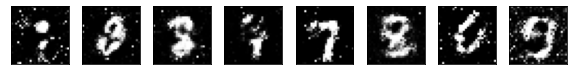

1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 11ms/step
[Step 15500] D Loss: 0.5116; G Loss: 1.1248
1/1 [==============================] - 0s 11ms/step


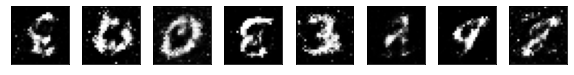

1/1 [==============================] - 0s 9ms/step


1/1 [==============================] - 0s 9ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 11ms/step
[Step 16000] D Loss: 0.4556; G Loss: 1.1880
1/1 [==============================] - 0s 11ms/step


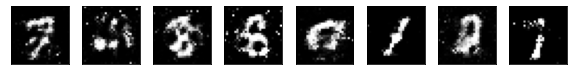

1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 9ms/step


1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 10ms/step
[Step 16500] D Loss: 0.7890; G Loss: 1.2351
1/1 [==============================] - 0s 10ms/step


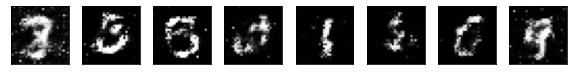

1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 11ms/step
[Step 17000] D Loss: 0.5397; G Loss: 1.3773
1/1 [==============================] - 0s 10ms/step


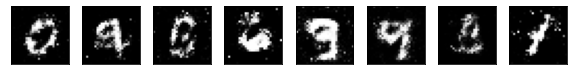

1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 9ms/step


1/1 [==============================] - 0s 10ms/step
[Step 17500] D Loss: 0.5134; G Loss: 1.3881
1/1 [==============================] - 0s 10ms/step


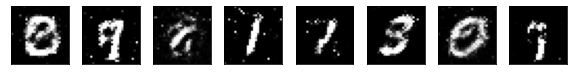

1/1 [==============================] - 0s 9ms/step


1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 9ms/step


1/1 [==============================] - 0s 11ms/step
[Step 18000] D Loss: 0.6437; G Loss: 1.5237
1/1 [==============================] - 0s 9ms/step


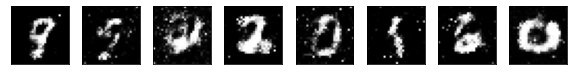

1/1 [==============================] - 0s 9ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 9ms/step
[Step 18500] D Loss: 0.4822; G Loss: 1.3919
1/1 [==============================] - 0s 9ms/step


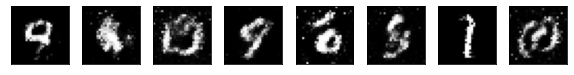

1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 10ms/step


In [10]:
for step, true_images in enumerate(train_ds):
    
    # Train Discriminator
    
    noise = np.random.normal(0, 1, (HALF_BATCH_SIZE, INPUT_DIM)).astype(np.float32)
    syntetic_images = generator.predict(noise)
    x_combined = np.concatenate((
        true_images, 
        syntetic_images))
    y_combined = np.concatenate((
        np.ones((HALF_BATCH_SIZE, 1)), 
        np.zeros((HALF_BATCH_SIZE, 1))))
    
    with tf.GradientTape() as tape:
        logits = discriminator(x_combined)
        d_loss_value = tf.compat.v1.losses.sigmoid_cross_entropy(y_combined, logits)
    grads = tape.gradient(d_loss_value, discriminator.trainable_variables)
    optimizer.apply_gradients(zip(grads, discriminator.trainable_variables))
    
    # Train Generator
    
    noise = np.random.normal(0, 1, (BATCH_SIZE, INPUT_DIM)).astype(np.float32)
    y_mislabled = np.ones((BATCH_SIZE, 1))
    
    with tf.GradientTape() as tape:
        logits = discriminator(generator(noise, training=True))
        g_loss_value = tf.compat.v1.losses.sigmoid_cross_entropy(y_mislabled, logits)
    grads = tape.gradient(g_loss_value, generator.trainable_variables)
    optimizer.apply_gradients(zip(grads, generator.trainable_variables))
    
    # Check intermediate results
    
    if step % 500 == 0:
        print("[Step %2d] D Loss: %.4f; G Loss: %.4f" % (
            step, d_loss_value.numpy(), g_loss_value.numpy()))
        noise = np.random.normal(0, 1, (8, INPUT_DIM)).astype(np.float32)
        syntetic_images = generator.predict(noise)
        plot_digits(syntetic_images)


## Generator test: random examples

1/1 [==============================] - 0s 10ms/step


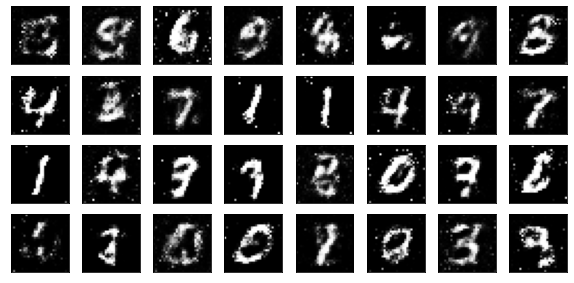

In [11]:
noise = np.random.normal(0, 1, (32, INPUT_DIM)).astype(np.float32)
syntetic_images = generator.predict(noise)
plot_digits(syntetic_images)

## Generator test: continuous examples

1/1 [==============================] - 0s 9ms/step


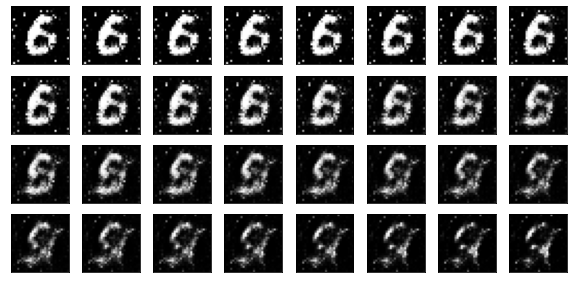

In [19]:
noise_1 = np.random.normal(0, 1, (INPUT_DIM)).astype(np.float32)
noise_2 = np.random.normal(0, 1, (INPUT_DIM)).astype(np.float32)
noise = np.linspace(noise_1, noise_2, 32)
syntetic_images = generator.predict(noise)
plot_digits(syntetic_images)

## Deep Convolutional GAN (DCGAN)

In [20]:
generator = M.Sequential([
    L.Dense(128*7*7, activation="relu"),
    L.Reshape((7, 7, 128)),
    L.UpSampling2D((2, 2)),    
    L.Conv2D(128, (3, 3), padding="same"),
    L.BatchNormalization(momentum=0.8),
    L.ReLU(),    
    L.UpSampling2D((2, 2)),    
    L.Conv2D(64, (3, 3), padding="same"),
    L.BatchNormalization(momentum=0.8),
    L.ReLU(),    
    L.Conv2D(1, (3, 3), padding="same", activation='tanh'),
])

discriminator = M.Sequential([
    L.Conv2D(32, (3, 3), strides=(2, 2), padding="same"),
    L.LeakyReLU(0.2),
    L.Dropout(0.25),    
    L.Conv2D(64, kernel_size=3, strides=(2, 2), padding="same"),
    L.ZeroPadding2D(padding=((0, 1), (0, 1))),
    L.BatchNormalization(momentum=0.8),
    L.LeakyReLU(alpha=0.2),
    L.Dropout(0.25),
    L.Conv2D(128, kernel_size=3, strides=(2, 2), padding="same"),
    L.BatchNormalization(momentum=0.8),
    L.LeakyReLU(alpha=0.2),
    L.Dropout(0.25),
    L.Conv2D(256, kernel_size=3, strides=(1, 1), padding="same"),
    L.BatchNormalization(momentum=0.8),
    L.LeakyReLU(alpha=0.2),
    L.Dropout(0.25),
    L.Flatten(),
    L.Dense(1, activation=None),
])

## Training parameters, dataset pipeline, optimizer

In [21]:
INPUT_DIM = 100
NUM_EPOCHS = 2
HALF_BATCH_SIZE = 16
BATCH_SIZE = HALF_BATCH_SIZE * 2
LEARNING_RATE = 0.0002

train_ds = tf.data.Dataset.from_tensor_slices(train_x.reshape(-1, 28, 28, 1))
train_ds = train_ds.shuffle(buffer_size=train_x.shape[0])
train_ds = train_ds.repeat(NUM_EPOCHS)
train_ds = train_ds.batch(HALF_BATCH_SIZE, drop_remainder=True)

optimizer = tf.keras.optimizers.Adam(LEARNING_RATE)

## DCGAN training

1/1 [==============================] - 2s 2s/step


2022-09-16 20:02:06.726097: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2022-09-16 20:02:06.726512: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


[Step  0] D Loss: 1.1052; G Loss: 0.6646
1/1 [==============================] - 0s 31ms/step


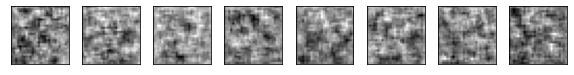

1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 11ms/step
[Step 200] D Loss: 0.6911; G Loss: 2.5038
1/1 [==============================] - 0s 10ms/step


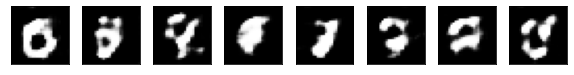

1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 10ms/step
[Step 400] D Loss: 0.5619; G Loss: 1.1654
1/1 [==============================] - 0s 10ms/step


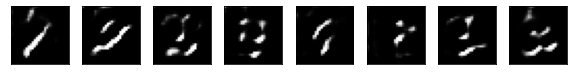

1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 10ms/step
[Step 600] D Loss: 0.7440; G Loss: 1.2352
1/1 [==============================] - 0s 12ms/step


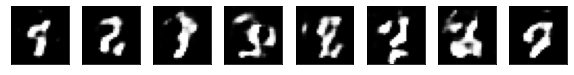

1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 10ms/step
[Step 800] D Loss: 0.4767; G Loss: 1.5728
1/1 [==============================] - 0s 11ms/step


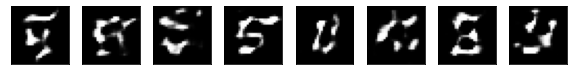

1/1 [==============================] - 0s 9ms/step


1/1 [==============================] - 0s 11ms/step
[Step 1000] D Loss: 0.7820; G Loss: 0.9346
1/1 [==============================] - 0s 12ms/step


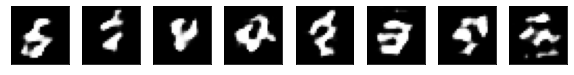

1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 11ms/step
[Step 1200] D Loss: 0.8042; G Loss: 0.9410
1/1 [==============================] - 0s 11ms/step


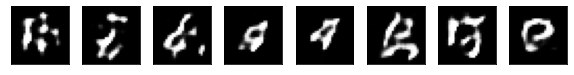

1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 10ms/step
[Step 1400] D Loss: 0.6720; G Loss: 1.0010
1/1 [==============================] - 0s 11ms/step


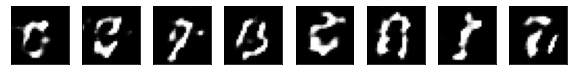

1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 11ms/step
[Step 1600] D Loss: 0.6482; G Loss: 1.2843
1/1 [==============================] - 0s 12ms/step


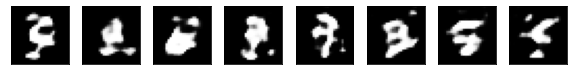

1/1 [==============================] - 0s 9ms/step


1/1 [==============================] - 0s 11ms/step
[Step 1800] D Loss: 0.7446; G Loss: 1.1520
1/1 [==============================] - 0s 10ms/step


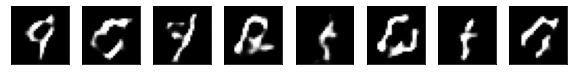

1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 11ms/step
[Step 2000] D Loss: 0.5116; G Loss: 1.0966
1/1 [==============================] - 0s 11ms/step


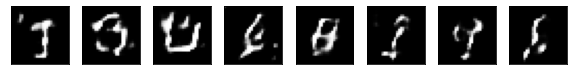

1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 10ms/step
[Step 2200] D Loss: 0.6672; G Loss: 1.0240
1/1 [==============================] - 0s 10ms/step


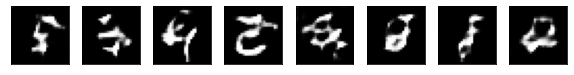

1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 11ms/step
[Step 2400] D Loss: 0.6256; G Loss: 0.9332
1/1 [==============================] - 0s 12ms/step


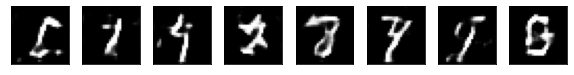

1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 11ms/step
[Step 2600] D Loss: 0.6967; G Loss: 1.0155
1/1 [==============================] - 0s 11ms/step


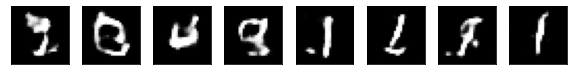

1/1 [==============================] - 0s 9ms/step


1/1 [==============================] - 0s 10ms/step
[Step 2800] D Loss: 0.6993; G Loss: 0.7621
1/1 [==============================] - 0s 11ms/step


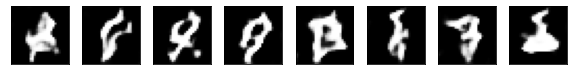

1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 11ms/step
[Step 3000] D Loss: 0.5277; G Loss: 0.8989
1/1 [==============================] - 0s 11ms/step


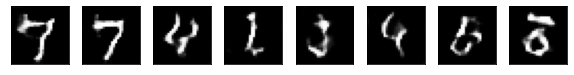

1/1 [==============================] - 0s 9ms/step


1/1 [==============================] - 0s 10ms/step
[Step 3200] D Loss: 0.5889; G Loss: 1.0778
1/1 [==============================] - 0s 11ms/step


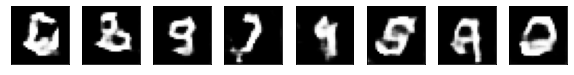

1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 11ms/step
[Step 3400] D Loss: 0.6470; G Loss: 0.9110
1/1 [==============================] - 0s 12ms/step


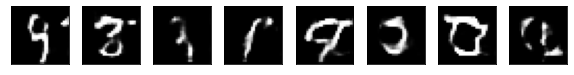

1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 11ms/step
[Step 3600] D Loss: 0.7415; G Loss: 0.9099
1/1 [==============================] - 0s 10ms/step


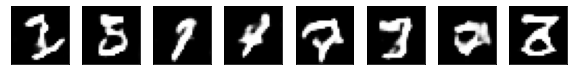

1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 12ms/step
[Step 3800] D Loss: 0.7455; G Loss: 0.9467
1/1 [==============================] - 0s 12ms/step


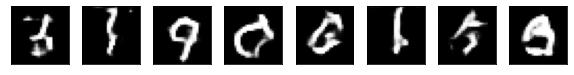

1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 14ms/step
[Step 4000] D Loss: 0.9166; G Loss: 0.9570
1/1 [==============================] - 0s 11ms/step


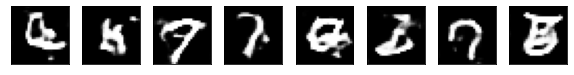

1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 10ms/step
[Step 4200] D Loss: 0.8140; G Loss: 0.7829
1/1 [==============================] - 0s 10ms/step


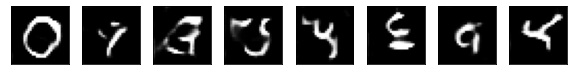

1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 12ms/step
[Step 4400] D Loss: 0.5750; G Loss: 0.7946
1/1 [==============================] - 0s 11ms/step


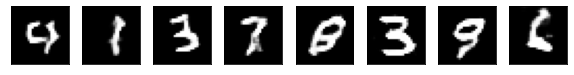

1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 10ms/step
[Step 4600] D Loss: 0.6181; G Loss: 0.9899
1/1 [==============================] - 0s 10ms/step


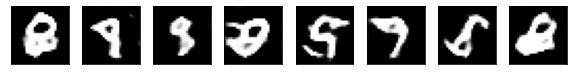

1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 12ms/step
[Step 4800] D Loss: 0.6402; G Loss: 0.9495
1/1 [==============================] - 0s 12ms/step


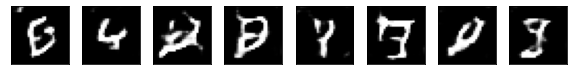

1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 11ms/step
[Step 5000] D Loss: 0.6611; G Loss: 0.9147
1/1 [==============================] - 0s 12ms/step


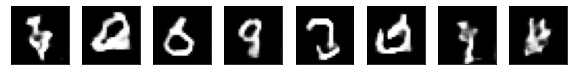

1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 12ms/step
[Step 5200] D Loss: 0.6864; G Loss: 0.7951
1/1 [==============================] - 0s 11ms/step


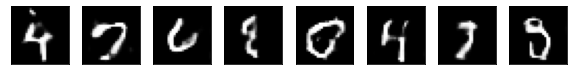

1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 11ms/step
[Step 5400] D Loss: 0.6728; G Loss: 0.7231
1/1 [==============================] - 0s 11ms/step


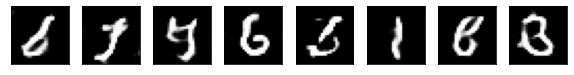

1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 12ms/step
[Step 5600] D Loss: 0.6417; G Loss: 0.8376
1/1 [==============================] - 0s 12ms/step


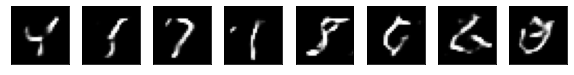

1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 14ms/step
[Step 5800] D Loss: 0.5589; G Loss: 0.8700
1/1 [==============================] - 0s 11ms/step


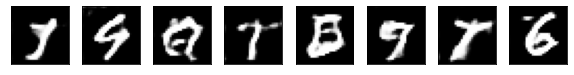

1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 10ms/step
[Step 6000] D Loss: 0.7105; G Loss: 0.7504
1/1 [==============================] - 0s 10ms/step


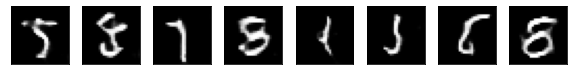

1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 12ms/step
[Step 6200] D Loss: 0.7128; G Loss: 0.8190
1/1 [==============================] - 0s 11ms/step


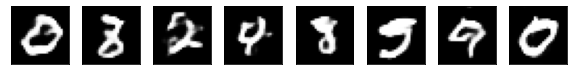

1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 11ms/step
[Step 6400] D Loss: 0.6281; G Loss: 0.7219
1/1 [==============================] - 0s 10ms/step


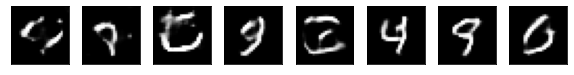

1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 12ms/step
[Step 6600] D Loss: 0.6837; G Loss: 0.8528
1/1 [==============================] - 0s 13ms/step


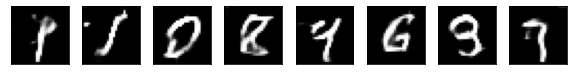

1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 11ms/step
[Step 6800] D Loss: 0.6176; G Loss: 0.8267
1/1 [==============================] - 0s 12ms/step


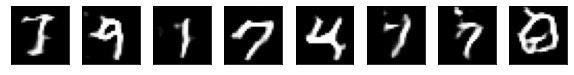

1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 10ms/step
[Step 7000] D Loss: 0.8532; G Loss: 0.8229
1/1 [==============================] - 0s 11ms/step


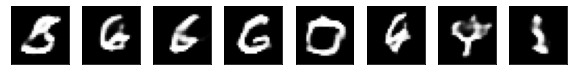

1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 11ms/step
[Step 7200] D Loss: 0.7063; G Loss: 0.7141
1/1 [==============================] - 0s 11ms/step


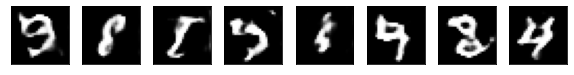

1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 11ms/step
[Step 7400] D Loss: 0.6904; G Loss: 0.9420
1/1 [==============================] - 0s 10ms/step


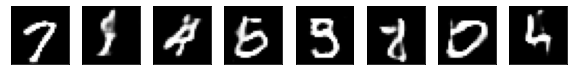

1/1 [==============================] - 0s 12ms/step


In [22]:
for step, true_images in enumerate(train_ds):
    
    # Train Discriminator
    
    noise = np.random.normal(0, 1, (HALF_BATCH_SIZE, INPUT_DIM)).astype(np.float32)
    syntetic_images = generator.predict(noise)
    x_combined = np.concatenate((
        true_images, 
        syntetic_images))
    y_combined = np.concatenate((
        np.ones((HALF_BATCH_SIZE, 1)), 
        np.zeros((HALF_BATCH_SIZE, 1))))
    
    with tf.GradientTape() as tape:
        logits = discriminator(x_combined, training=True)
        d_loss_value = tf.compat.v1.losses.sigmoid_cross_entropy(y_combined, logits)
    grads = tape.gradient(d_loss_value, discriminator.trainable_variables)
    optimizer.apply_gradients(zip(grads, discriminator.trainable_variables))
    
    # Train Generator
    
    noise = np.random.normal(0, 1, (BATCH_SIZE, INPUT_DIM)).astype(np.float32)
    y_mislabled = np.ones((BATCH_SIZE, 1))
    
    with tf.GradientTape() as tape:
        syntetic = generator(noise, training=True)
        logits = discriminator(syntetic, training=False)
        g_loss_value = tf.compat.v1.losses.sigmoid_cross_entropy(y_mislabled, logits)
    grads = tape.gradient(g_loss_value, generator.trainable_variables)
    optimizer.apply_gradients(zip(grads, generator.trainable_variables))
    
    # Check intermediate results
    
    if step % 200 == 0:
        print("[Step %2d] D Loss: %.4f; G Loss: %.4f" % (
            step, d_loss_value.numpy(), g_loss_value.numpy()))
        noise = np.random.normal(0, 1, (8, INPUT_DIM)).astype(np.float32)
        syntetic_images = generator.predict(noise)
        plot_digits(syntetic_images)


## Generator test: random examples

1/1 [==============================] - 0s 11ms/step


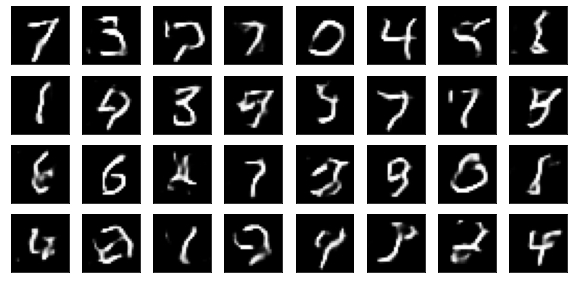

In [23]:
noise = np.random.normal(0, 1, (32, INPUT_DIM)).astype(np.float32)
syntetic_images = generator.predict(noise)
plot_digits(syntetic_images)

## Generator test: continuous examples

1/1 [==============================] - 0s 10ms/step


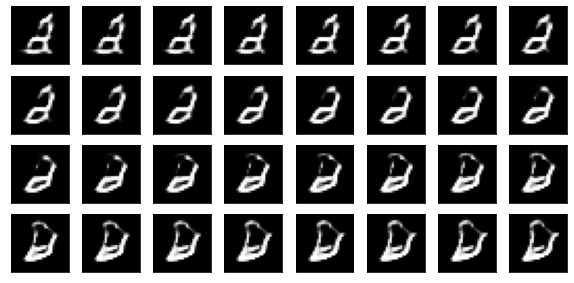

In [27]:
noise_1 = np.random.normal(0, 1, (INPUT_DIM)).astype(np.float32)
noise_2 = np.random.normal(0, 1, (INPUT_DIM)).astype(np.float32)
noise = np.linspace(noise_1, noise_2, 32)
syntetic_images = generator.predict(noise)
plot_digits(syntetic_images)

In [ ]:
# больше примеров можно найти тут https://github.com/eriklindernoren/Keras-GAN